In [362]:
# Classification of messages into 'spam' and 'ham' using NLP Tools and ML algorithms 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import nltk
import seaborn as sns

In [363]:
df = pd.read_csv('Messages_Spam_Ham.csv', header=None, names=['Type', 'Text'])

In [364]:
df.head()

,Type,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [365]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Type    5574 non-null   object
 1   Text    5574 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [366]:
df.isnull().sum()

Type    0
Text    0
dtype: int64

In [367]:
df['Type'].value_counts()

ham     4827
spam     747
Name: Type, dtype: int64

In [368]:
from sklearn.model_selection import train_test_split
text_train, text_test, type_train, type_test = train_test_split(df['Text'], df['Type'], test_size = 0.3)

In [369]:
text_train.shape

(3901,)

In [370]:
text_test.shape

(1673,)

In [371]:
type(text_train)

pandas.core.series.Series

In [372]:
type_train.shape

(3901,)

In [373]:
train = pd.concat([type_train, text_train], axis=1)

In [375]:
train.to_csv('train.csv')

In [376]:
test = pd.concat([type_test, text_test], axis=1)

In [377]:
test.to_csv('test.csv')

In [160]:
# PERFORM DATA CLEANING (REMOVE PUNCTUATIONS FROM TEXT)

In [203]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [204]:
def remove_punc(text):
    Text_punc_removed = [char for char in text if not char in string.punctuation]
    Text_punc_removed = ''.join(Text_punc_removed)
    return Text_punc_removed

In [205]:
text_train = text_train.apply(remove_punc)

In [206]:
text_train.head()

2775              Dude u knw also teluguthts gudk gud nyt
276                                                 Thanx
4269                       Hey so whats the plan this sat
3510    Hi Peteynoim ok just wanted 2 chat coz avent s...
1857    Say this slowly GODI LOVE YOU amp I NEED YOUCL...
Name: Text, dtype: object

In [207]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91982\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [208]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import gensim
from gensim.utils import simple_preprocess
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\91982\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [209]:
stop_words = stopwords.words('english')

In [210]:
# Remove stopwords
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in stop_words:
            result.append(token)
    return result

In [211]:
text_train = text_train.apply(preprocess)

In [212]:
text_train.head()

2775        [dude, knw, also, teluguthts, gudk, gud, nyt]
276                                               [thanx]
4269                              [hey, whats, plan, sat]
3510    [hi, peteynoim, ok, wanted, chat, coz, avent, ...
1857    [say, slowly, godi, love, amp, need, youclean,...
Name: Text, dtype: object

In [213]:
# Stemming of words

In [214]:
ps = PorterStemmer()
def stem(text):
    Text_stemmed = [ps.stem(char) for char in text]
    return Text_stemmed

In [215]:
text_train = text_train.apply(stem)

In [216]:
text_train.head()

2775         [dude, knw, also, telugutht, gudk, gud, nyt]
276                                               [thanx]
4269                               [hey, what, plan, sat]
3510    [hi, peteynoim, ok, want, chat, coz, avent, sp...
1857    [say, slowli, godi, love, amp, need, youclean,...
Name: Text, dtype: object

In [217]:
# Lemmatization of words

In [218]:
lemmatizer = WordNetLemmatizer()
def lemma(text):
    Text_lemmatized = [lemmatizer.lemmatize(char) for char in text]
    return Text_lemmatized

In [219]:
text_train = text_train.apply(lemma)

In [220]:
text_train.head()

2775         [dude, knw, also, telugutht, gudk, gud, nyt]
276                                               [thanx]
4269                               [hey, what, plan, sat]
3510    [hi, peteynoim, ok, want, chat, coz, avent, sp...
1857    [say, slowli, godi, love, amp, need, youclean,...
Name: Text, dtype: object

In [221]:
text_train = text_train.apply(lambda x: ' '.join(x))

In [222]:
text_train.head()

2775                 dude knw also telugutht gudk gud nyt
276                                                 thanx
4269                                    hey what plan sat
3510    hi peteynoim ok want chat coz avent spoken lon...
1857    say slowli godi love amp need youclean heart b...
Name: Text, dtype: object

In [223]:
text_train[0]

'go jurong point crazi avail bugi great world la buffet cine got amor wat'

In [233]:
type(type_train[0])

str

In [228]:
text_train.shape

(3901,)

In [234]:
range(0, text_train.shape[0])

range(0, 3901)

In [252]:
# Store all the ham messages from training dataset in text_train_ham list
text_train_ham = []
for index1,i in enumerate(type_train):
    for index2,j in enumerate(text_train):     
        if i == 'ham' and index1 == index2:
            text_train_ham.append(j)

In [253]:
len(text_train_ham)

3374

In [254]:
# Store all the spam messages from training dataset in text_train_spam list
text_train_spam = []
for index1,i in enumerate(type_train):
    for index2,j in enumerate(text_train):     
        if i == 'spam' and index1 == index2:
            text_train_spam.append(j)

In [257]:
len(text_train_spam)

527

In [224]:
# Plot WORDCLOUD
from wordcloud import WordCloud

In [184]:
# Word Cloud for spam words

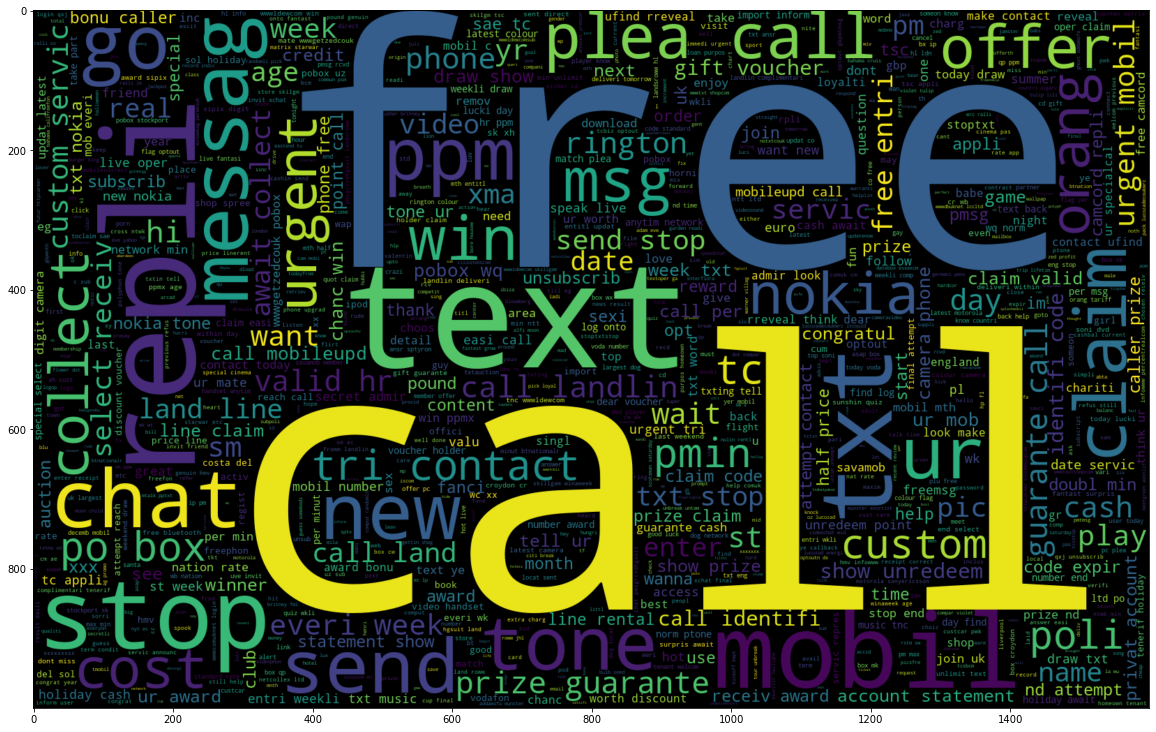

In [259]:
plt.figure(figsize = (20, 20)) 
wc = WordCloud(max_words = 1000 , width = 1600 , height = 1000).generate(" ".join(text_train_spam))
plt.imshow(wc, interpolation = 'bilinear');

In [186]:
# Word Cloud for ham words 

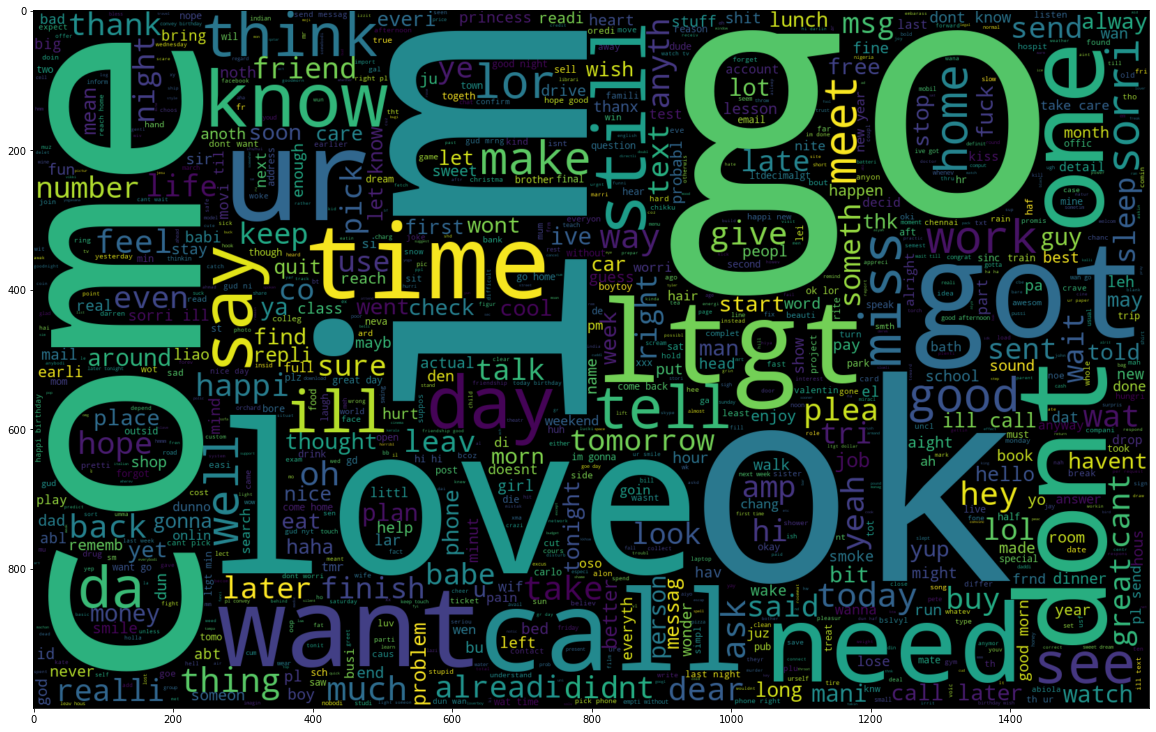

In [260]:
plt.figure(figsize = (20, 20)) 
wc = WordCloud(max_words = 1000 , width = 1600 , height = 1000).generate(" ".join(text_train_ham))
plt.imshow(wc, interpolation = 'bilinear');

In [261]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

In [262]:
# Bag of Words model
bow = CountVectorizer().fit(text_train)
message_bow = bow.transform(text_train)
# Using TFIDF (Term Frequency Inverse Document Frequency)
tfidf = TfidfTransformer().fit(message_bow)
message_tfidf = tfidf.transform(message_bow)

In [263]:
message_tfidf.shape

(3901, 5741)

In [264]:
type(message_tfidf)

scipy.sparse.csr.csr_matrix

In [273]:
X_train = message_tfidf

In [274]:
y_train = type_train.values

In [275]:
y_train

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [276]:
y_train.shape

(3901,)

In [277]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [278]:
y_train = le.fit_transform(y_train)

In [279]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

In [280]:
y_train.shape

(3901,)

In [272]:
# Applying Multinomial naive Bayes algorithm
msg_classifier = MultinomialNB()

In [281]:
msg_classifier.fit(X_train, y_train)

MultinomialNB()

In [282]:
X_test = text_test
X_test = X_test.apply(remove_punc)
X_test = X_test.apply(preprocess)
X_test = X_test.apply(stem)
X_test = X_test.apply(lemma)

In [284]:
X_test = X_test.apply(lambda x: ' '.join(x))

In [285]:
X_test

3590    ive sent wife text buy shell tell relax go get...
1190                        case guess ill see campu lodg
1515                                     kall bestcongrat
1401         decid peopl care stuff vote care stuff loser
4411                     also didnt get na hi hi hi hi hi
                              ...                        
1987                               santha num corrct dane
485                    chang fb jaykwon thuglyf falconerf
1124                                   good morn princess
5467    shall bring u bottl wine keep u amus joke brin...
2956                  id check there like bowl worth left
Name: Text, Length: 1673, dtype: object

In [286]:
X_test_bow = bow.transform(X_test)
X_test_tfidf = tfidf.transform(X_test_bow)

In [287]:
X_test_tfidf

<1673x5741 sparse matrix of type '<class 'numpy.float64'>'
	with 12417 stored elements in Compressed Sparse Row format>

In [302]:
y_test = type_test.values

In [303]:
y_test

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [304]:
y_test = le.transform(y_test)

In [305]:
y_test

array([0, 0, 0, ..., 0, 0, 0])

In [288]:
y_pred = msg_classifier.predict(X_test_tfidf)

In [298]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [306]:
y_pred.shape

(1673,)

In [307]:
y_test.shape

(1673,)

In [308]:
from sklearn.metrics import accuracy_score, classification_report

In [309]:
# Accuracy score for the testset
print(accuracy_score(y_test, y_pred))

0.9647340107591154


In [310]:
# Classification report for the testset
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1453
           1       1.00      0.73      0.85       220

    accuracy                           0.96      1673
   macro avg       0.98      0.87      0.91      1673
weighted avg       0.97      0.96      0.96      1673



In [311]:
y_train_pred = msg_classifier.predict(X_train)

In [312]:
# Accuracy score for the training set
print(accuracy_score(y_train, y_train_pred))

0.97641630351192


In [313]:
# Classification report for the trainingset
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      3374
           1       1.00      0.83      0.90       527

    accuracy                           0.98      3901
   macro avg       0.99      0.91      0.95      3901
weighted avg       0.98      0.98      0.98      3901



In [ ]:
# Applying SVM (Support Vector Machine) algorithm

In [358]:
from sklearn.svm import SVC
msg_classifier = SVC(kernel='rbf')

In [359]:
msg_classifier.fit(X_train, y_train)

SVC()

In [319]:
y_pred = msg_classifier.predict(X_test_tfidf)

In [320]:
# Accuracy score for the testset
print(accuracy_score(y_test, y_pred))

0.9742976688583384


In [321]:
# Classification report for the testset
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1453
           1       0.98      0.82      0.89       220

    accuracy                           0.97      1673
   macro avg       0.98      0.91      0.94      1673
weighted avg       0.97      0.97      0.97      1673



In [327]:
y_train_pred = msg_classifier.predict(X_train)

In [328]:
# Accuracy score for the training set
print(accuracy_score(y_train, y_train_pred))

0.9971802102025121


In [329]:
# Classification report for the trainingset
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3374
           1       1.00      0.98      0.99       527

    accuracy                           1.00      3901
   macro avg       1.00      0.99      0.99      3901
weighted avg       1.00      1.00      1.00      3901



In [325]:
# Applying Random Forest algorithm

In [326]:
from sklearn.ensemble import RandomForestClassifier

In [330]:
msg_classifier = RandomForestClassifier(n_estimators=100)

In [331]:
msg_classifier.fit(X_train, y_train)
y_pred = msg_classifier.predict(X_test_tfidf)

In [332]:
# Accuracy score for the testset
print(accuracy_score(y_test, y_pred))

0.9665271966527197


In [333]:
# Classification report for the testset
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1453
           1       1.00      0.75      0.85       220

    accuracy                           0.97      1673
   macro avg       0.98      0.87      0.92      1673
weighted avg       0.97      0.97      0.96      1673



In [334]:
y_train_pred = msg_classifier.predict(X_train)

In [336]:
# Accuracy score for the training set
print(accuracy_score(y_train, y_train_pred))

0.9997436554729556


In [337]:
# Classification report for the trainingset
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3374
           1       1.00      1.00      1.00       527

    accuracy                           1.00      3901
   macro avg       1.00      1.00      1.00      3901
weighted avg       1.00      1.00      1.00      3901



In [ ]:
# Since SVM model gave us the best accuracy, precision, recall and f1-score on both trainingset and testset, 
# we will go ahead with this model for this classification problem.  

In [ ]:
# Prediction of single text data with SVM

In [351]:
type(text_test)

pandas.core.series.Series

In [346]:
single_text_data = text_test[2956]

In [347]:
single_text_data

"Id have to check but there's only like 1 bowls worth left"

In [348]:
type(single_text_data)

str

In [352]:
single_text_data = pd.Series(single_text_data)

In [353]:
single_text_data

0    Id have to check but there's only like 1 bowls...
dtype: object

In [354]:
type_test[2956]

'ham'

In [355]:
single_text_data_test = single_text_data.apply(remove_punc)
single_text_data_test = single_text_data_test.apply(preprocess)
single_text_data_test = single_text_data_test.apply(stem)
single_text_data_test = single_text_data_test.apply(lemma)
single_text_data_test = single_text_data_test.apply(lambda x: ' '.join(x))

In [357]:
single_text_data_test_bow = bow.transform(single_text_data_test)
single_text_data_test_tfidf = tfidf.transform(single_text_data_test_bow)

In [360]:
y_pred_for_single_text_data_test = msg_classifier.predict(single_text_data_test_tfidf)

In [361]:
y_pred_for_single_text_data_test

array([0])

In [ ]:
# So, it predicted the class of the single message text correctly and it is 0 ('ham').

In [385]:
text_test[3155]

'Not heard from U4 a while. Call 4 rude chat private line 01223585334 to cum. Wan 2C pics of me gettin shagged then text PIX to 8552. 2End send STOP 8552 SAM xxx'

In [386]:
type_test[3155]

'spam'